## Regresion lineal 

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split

# Cargar el DataFrame
df = pd.read_csv('../data/data.csv')

# Crear variables objetivo 
df['diferencia_goles'] = df['goles_local'] - df['goles_visitante']

# Variables predictoras
X = df[['posesion_local (%)', 'tiros_arco_local']]
y = df['diferencia_goles']

# División estándar: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
from sklearn.linear_model import LinearRegression

# Instanciar y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("¡Modelo entrenado con éxito!")

¡Modelo entrenado con éxito!


In [4]:
# Mostrar coeficientes del modelo
print(f"Intercepto: {modelo.intercept_}")
print(f"Coeficientes: {modelo.coef_}")

# Interpretación amigable
for idx, col_name in enumerate(X.columns):
    print(f"Si aumentamos 1 unidad en '{col_name}, la diferencia de goles cambia en promedio {modelo.coef_[idx]:.2f}.")


Intercepto: -2.5257192572329776
Coeficientes: [ 0.05596278 -0.05125811]
Si aumentamos 1 unidad en 'posesion_local (%), la diferencia de goles cambia en promedio 0.06.
Si aumentamos 1 unidad en 'tiros_arco_local, la diferencia de goles cambia en promedio -0.05.


In [5]:
# Hacer predicciones
y_pred = modelo.predict(X_test)

# Comparar predicciones con valores reales
df_resultados = X_test.copy()
df_resultados['diferencia_goles_real'] = y_test
df_resultados['diferencia_goles_predicha'] = y_pred.round(2)

df_resultados.head(10)

,posesion_local (%),tiros_arco_local,diferencia_goles_real,diferencia_goles_predicha
83,47,3,3,-0.05
53,60,3,3,0.68
70,50,5,0,0.02
45,57,7,3,0.31
44,45,5,5,-0.26
39,60,7,3,0.47
22,45,11,0,-0.57
80,49,5,1,-0.04
10,48,5,-2,-0.10
0,54,12,2,-0.12


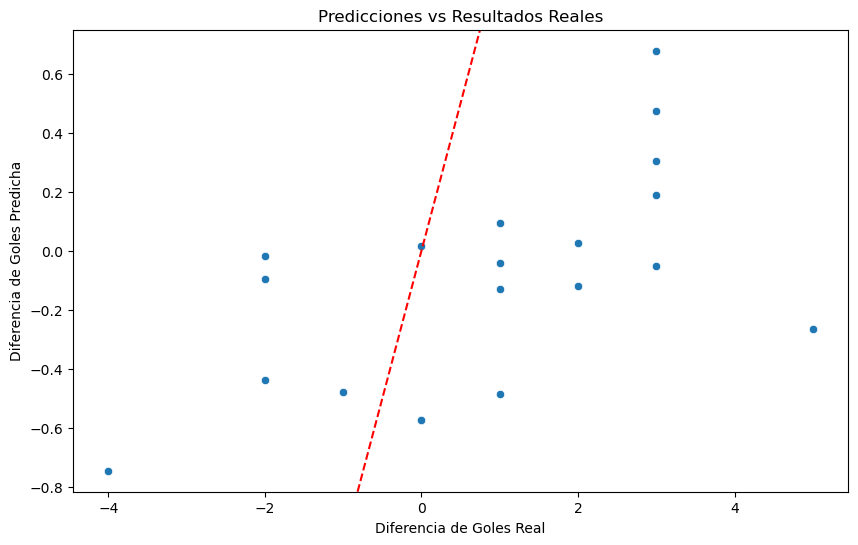

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Diferencia de Goles Real')
plt.ylabel('Diferencia de Goles Predicha')
plt.title('Predicciones vs Resultados Reales')
plt.axline((0,0), slope=1, color='red', linestyle='--')  # Línea de referencia
plt.show()

In [8]:
import ipywidgets as widgets

# Widgets de entrada 
posesion_input = widgets.FloatSlider(min=30, max=70, step=1, description='Posesión (%)')
tiros_input = widgets.FloatSlider(min=1, max=15, step=1, description='Tiros al Arco')

# Función de predicción
def predecir_goles(posesion, tiros):
    # Crear DataFrame de entrada
    entrada = pd.DataFrame([[posesion, tiros]], columns=['posesion_local (%)', 'tiros_arco_local'])
    pred = modelo.predict(entrada)[0]
    print(f"Predicción de diferencia de goles: {pred:.2f}")
    
# Mostrar widget interactivo
widgets.interact(predecir_goles, posesion=posesion_input, tiros=tiros_input)

interactive(children=(FloatSlider(value=30.0, description='Posesión (%)', max=70.0, min=30.0, step=1.0), Float…

<function __main__.predecir_goles(posesion, tiros)>